In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [2]:
#Importing all images
list = []

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C:\\Users\\Felipe\\linear\\noncompound') if isfile(join('C:\\Users\\Felipe\\linear\\noncompound', f))]

for img in onlyfiles:
    list.append('C:\\Users\\Felipe\\linear\\noncompound\\'+img)

    
img_data = []    
for img in list:
    try:
        img_array = cv2.imread(img)
        #img_array = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)     
        img_data.append(img_array)
    except Exception as e:
        pass


In [3]:
print(len(img_data))
print(len(list))

2548
2548


In [1]:
img_path='C:\\Users\\Felipe\\linear\\noncompound\\Rajendran201861-Figure15-1.png'

In [5]:
img_path = list[random.randint(0, 2548)]

In [6]:
img_path

'C:\\Users\\Felipe\\linear\\noncompound\\10.1016_j.carbpol.2007.11.014-Figure3-1.png'

(410, 489, 3)


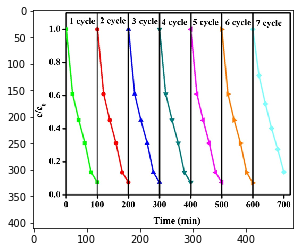

In [4]:
#Cargando la imagen

#img_array = cv2.imread(img_path, 0)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
#img_path = img_random
img_array = cv2.imread(img_path)
img_original = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
print(img_array.shape)

#plt.imshow(img_array, cmap = 'gray')
plt.imshow(img_original) # graph it
plt.show()

82
82
25.613496932515336


Text(0, 0.5, 'Promedio de los valores de esa fila')

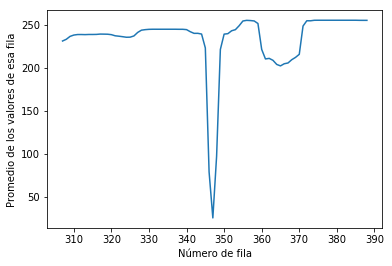

In [5]:
#Código para detectar dónde está el eje X (la línea del eje X)

#La mitad de la gráfica para abajo (de 187 a 374)
end = int(img_array.shape[0] - img_array.shape[0]*0.05)
height = img_array.shape[0]
half_height = int(3*height/4)

means = []
file = []
for i in range(half_height, end):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


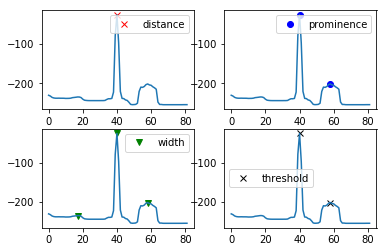

In [6]:
#Gráfico de la matriz inversa, para detectar los puntos más altos

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

meansnp = np.array(means)
meansnp = meansnp*-1

#x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + np.random.normal(0, 1, 1000) * 0.15
peaks, _ = find_peaks(meansnp, distance=60)
peaks2_x, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2_x, meansnp[peaks2_x], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [7]:
#Sistema de calificación de cada punto

if peaks2_x.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index_x = []
    anomalies_x = meansnp[peaks2_x]*-1
    for i in anomalies_x:
        index_x.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_x)

    puntajes_altura = []
    for i in anomalies_x:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_x.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    ejex = dict[anomalies_x[indice]]
        
if peaks2_x.shape[0] == 1: 
    ejex = dict[linea]
    
if peaks2_x.shape[0] == 0:
    ejex = dict[linea]

In [11]:
ejex

485

98
98
38.015447154471545
La línea está ubicada en la columna: 62
Analizar hasta: 61


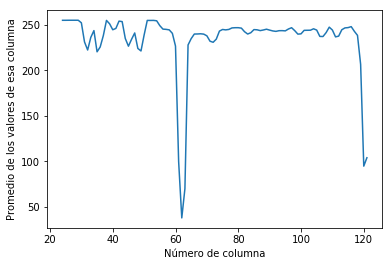

In [8]:
#Código para detectar dónde está el eje Y (la línea del eje Y)

#Establecer desde la izquierda de la imagen hasta el centro de la imagen
width = img_array.shape[1]
end = int(width/4)

start = int(img_array.shape[1] - img_array.shape[1]*0.95)
means_2 = []
col_2 = []

for i in range(start, end):
    
    calc = np.mean(img_array[:,i])
    means_2.append(calc)
    col_2.append(i)
    
    
dict_2 = {}
for key, value in zip(means_2, col_2):
    dict_2[key] = value
    
print(len(means_2))
print(len(col_2))
linea = min(means_2)
print(linea)
columna = dict_2[linea]


plt.plot(col_2, means_2)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

print("La línea está ubicada en la columna: " + str(columna))
print("Analizar hasta: " + str(columna-1))

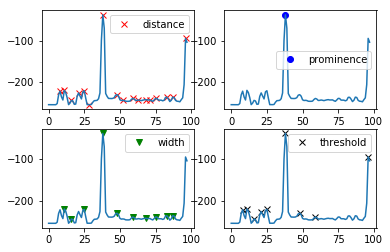

In [9]:
#Gráfico de la matriz inversa, para detectar los puntos más altos
meansnp = np.array(means_2)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [10]:
#Otro enfoque diferente al sistema de calificación: escoger solamente el mayor valor de la matriz inversa

if peaks2.shape[0] == 0:
    columna = columna


if peaks2.shape[0] > 1:
    index = []
    anomalies = meansnp[peaks2]*-1
    for i in anomalies:
        index.append(dict_2[i])

    new_valor = max(index)
    columna = new_valor
    
    
if peaks2.shape[0] == 1:
    columna = columna

163
163


Text(0, 0.5, 'Promedio de los valores de esa columna')

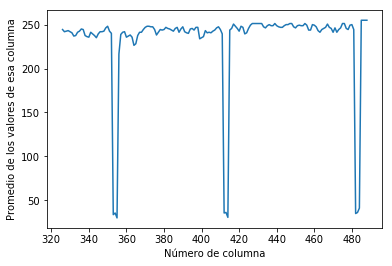

In [11]:
#Código para detectar dónde está el borde derecho de la imagen (si tiene)
#Establecer desde la derecha de la imagen hasta el centro de la imagen

img_array = cv2.imread(img_path)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

width = img_array.shape[1]
half_width = int(2*width/3)

end = int(width*0.95)
means_3 = []
file_3 = []

for i in range(half_width, width):
    
    calc = np.mean(img_array[:,i])
    means_3.append(calc)
    file_3.append(i)
    
    
dict_3 = {}
for key, value in zip(means_3, file_3):
    dict_3[key] = value
    
print(len(means_3))
print(len(file_3))
linea_3 = min(means_3)


plt.plot(file_3, means_3)
plt.xlabel('Número de columna')
plt.ylabel('Promedio de los valores de esa columna')

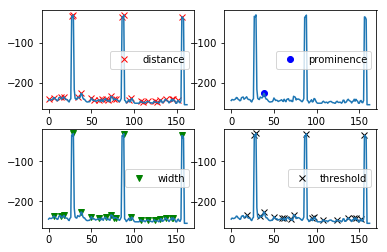

In [12]:
#Graficación de la matriz inversa

meansnp = np.array(means_3)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2_der, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [13]:
#Sistema de calificación

if peaks2_der.shape[0] == 0:
    
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]
        
if peaks2_der.shape[0] > 1:


    #El borde de la derecha se llama columna_derecha
    index_der = []
    anomalies_der = meansnp[peaks2_der]*-1
    for i in anomalies_der:
        index_der.append(dict_3[i])

    #Cálculo de probabilidades
    minimo = min(anomalies_der)

    puntajes_altura = []
    for i in anomalies_der:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies_der.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    maximo = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (i/maximo)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    columna_derecha = dict_3[anomalies_der[indice]]
        
if peaks2_der.shape[0] == 1: 
    if linea_3 > 100:
        columna_derecha = img_array.shape[1]
    else:
        columna_derecha = dict_3[linea_3]

102
102
33.895705521472394


Text(0, 0.5, 'Promedio de los valores de esa fila')

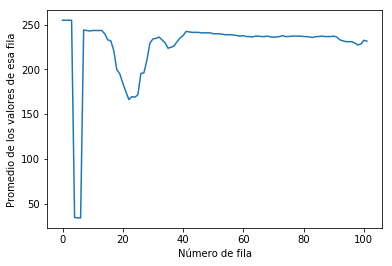

In [14]:
#Código para detectar dónde está el eje superior (si lo hay)

#La mitad de la gráfica para arriba
img_array = cv2.imread(img_path)
gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
img_array = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

height = img_array.shape[0]
half_height = int(1*height/4)

start = int(height*0.03)
means = []
file = []
for i in range(0, half_height):
    calc = np.mean(img_array[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(means, file):
    dict[key] = value
    
print(len(means))
print(len(file))
linea = min(means)
print(linea)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')



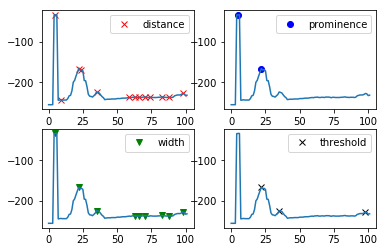

In [15]:
#Graficación de matriz inversa

meansnp = np.array(means)
meansnp = meansnp*-1

peaks, _ = find_peaks(meansnp, distance=2)
peaks2, _ = find_peaks(meansnp, prominence=40)      # BEST!
peaks3, _ = find_peaks(meansnp, width=2)
peaks4, _ = find_peaks(meansnp, threshold=1)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, meansnp[peaks], "xr"); plt.plot(meansnp); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, meansnp[peaks2], "ob"); plt.plot(meansnp); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, meansnp[peaks3], "vg"); plt.plot(meansnp); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, meansnp[peaks4], "xk"); plt.plot(meansnp); plt.legend(['threshold'])
plt.show()

In [16]:
#Sistema de calificación

if peaks2.shape[0] == 0:
    
    if linea > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]
        

if peaks2.shape[0] > 1:

    #El borde de la derecha se llama columna_derecha
    index = []
    anomalies = meansnp[peaks2]*-1
    for i in anomalies:
        index.append(dict[i])

    #Cálculo de probabilidades
    minimo = min(anomalies)

    puntajes_altura = []
    for i in anomalies:
        puntaje = (minimo/i)*100
        puntajes_altura.append(puntaje)

    anom_list = anomalies.tolist()
    posiciones = []
    for i in anom_list:
        posiciones.append(anom_list.index(i) + 1)

    minimo_pos = max(posiciones)

    puntajes_posiciones = []
    for i in posiciones:
        puntaje = (minimo_pos/i)*100
        puntajes_posiciones.append(puntaje)

    #Promedio de puntajes
    puntajes_finales = []
    for i in range(0, len(puntajes_altura)):
        final = (0.6*puntajes_altura[i]) + (0.4*puntajes_posiciones[i])
        puntajes_finales.append(final)
    
    puntaje_maximo = max(puntajes_finales)
    indice = puntajes_finales.index(puntaje_maximo)
    
    fila_arriba = dict[anomalies[indice]]
        
if peaks2.shape[0] == 1: 
    if linea_3 > 100:
        fila_arriba = 0
    else:
        fila_arriba = dict[linea]

(410, 489, 3)


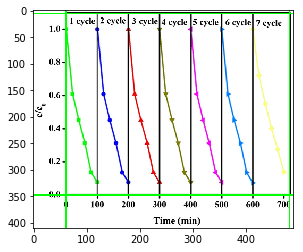

In [17]:
#Graficación de ejes
img_array = cv2.imread(img_path)
#imgGray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
print(img_array.shape)

#El orden es (columna, fila)

#Graficación del eje X
cv2.line(img_array, (0,ejex), (img_array.shape[1],ejex), (0, 255, 0), 2)

#Graficación del eje Y
cv2.line(img_array, (columna,0), (columna,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde derecho

cv2.line(img_array, (columna_derecha,0), (columna_derecha,img_array.shape[0]), (0, 255, 0), 2)

#Graficación del borde superior

cv2.line(img_array, (0,fila_arriba), (img_array.shape[1],fila_arriba), (0, 255, 0), 2)
    
plt.imshow(img_array)
plt.show()

In [18]:
#Los colores se muestran en RGB
import extcolors
colors, pixel_count = extcolors.extract(img_path)

colors_list = []
for i in range(0, len(colors)):
    
    color = colors[i][0]
    colors_list.append(color)

In [19]:
low_ranges = []
c = 40

for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] - c
    color2 = colors_list[h][1] - c
    color3 = colors_list[h][2] - c
    
    if color1 < 0:
        color1 = 0
    if color2 < 0:
        color2 = 0
    if color3 < 0:
        color3 = 0
    
    low_ranges.append([color1, color2, color3])
    
upper_ranges = []
    
for h in range(0, len(colors_list)):

    color1 = colors_list[h][0] + c
    color2 = colors_list[h][1] + c
    color3 = colors_list[h][2] + c
    
    if color1 > 255:
        color1 = 255
    if color2 > 255:
        color2 =255
    if color3 > 255:
        color3 = 255
    
    upper_ranges.append([color1, color2, color3])    
    
    
low_ranges

[[215, 215, 215],
 [0, 0, 0],
 [45, 45, 45],
 [200, 75, 0],
 [215, 0, 215],
 [0, 215, 0],
 [213, 0, 0],
 [0, 0, 189],
 [0, 63, 59],
 [45, 196, 48],
 [179, 0, 0],
 [18, 16, 187],
 [190, 1, 191],
 [208, 101, 207],
 [0, 76, 0],
 [201, 116, 30],
 [0, 0, 69],
 [0, 0, 0],
 [45, 0, 0],
 [0, 0, 0],
 [203, 57, 57],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [18, 0, 0]]

In [20]:
boundaries = []
for i in range(0, len(low_ranges)):
    boundaries.append((low_ranges[i], upper_ranges[i]))
boundaries

[([215, 215, 215], [255, 255, 255]),
 ([0, 0, 0], [41, 41, 41]),
 ([45, 45, 45], [125, 125, 125]),
 ([200, 75, 0], [255, 155, 49]),
 ([215, 0, 215], [255, 40, 255]),
 ([0, 215, 0], [40, 255, 40]),
 ([213, 0, 0], [255, 42, 40]),
 ([0, 0, 189], [40, 40, 255]),
 ([0, 63, 59], [40, 143, 139]),
 ([45, 196, 48], [125, 255, 128]),
 ([179, 0, 0], [255, 62, 68]),
 ([18, 16, 187], [98, 96, 255]),
 ([190, 1, 191], [255, 81, 255]),
 ([208, 101, 207], [255, 181, 255]),
 ([0, 76, 0], [41, 156, 41]),
 ([201, 116, 30], [255, 196, 110]),
 ([0, 0, 69], [41, 42, 149]),
 ([0, 0, 0], [50, 40, 51]),
 ([45, 0, 0], [125, 60, 59]),
 ([0, 0, 0], [77, 54, 40]),
 ([203, 57, 57], [255, 137, 137]),
 ([0, 0, 0], [53, 40, 41]),
 ([0, 0, 0], [40, 46, 40]),
 ([0, 0, 0], [54, 55, 75]),
 ([0, 0, 0], [40, 73, 40]),
 ([18, 0, 0], [98, 40, 40])]

In [21]:
#Código que aplica las máscaras de colores, detecta bordes y dibuja las líneas

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img_path.shape[2]
    match_mask_color = (255)
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image


def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), thickness=5)
    
        #Ahora se añaden las líneas a la imagen original
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
n= 10
#columna, fila
  
region_of_interest_vertices = [
    (int(columna+n), int(ejex-n)),
    (int(columna+n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(fila_arriba+n)),
    (int(columna_derecha-n), int(ejex-n))]


#Inicio del loop

for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")


    # find the colors within the specified boundaries
    mask = cv2.inRange(image, lower, upper)

    canny_image = cv2.Canny(mask, 50, 200)
    cropped_image = region_of_interest(canny_image, 
                                       np.array([region_of_interest_vertices], np.int32),)

    lines = cv2.HoughLinesP(cropped_image, 
                            rho=6, 
                            theta=np.pi/60, 
                            threshold=160, 
                            lines=np.array([]),
                            maxLineGap=25, 
                            minLineLength=100)

    image_with_lines = drow_the_lines(image, lines)

    cv2.imshow("lines", image_with_lines)
    cv2.imshow("cropped", cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(410, 489, 3)


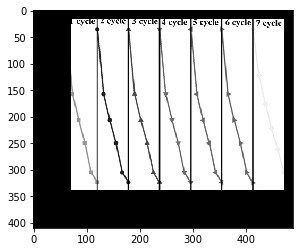

In [22]:
#Prueba de como queda segmentada la imagen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped_image = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)
plt.imshow(cropped_image, cmap = 'gray')
plt.show()

Resized Dimensions :  (902, 1075)


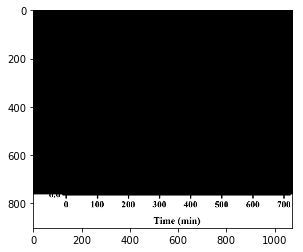

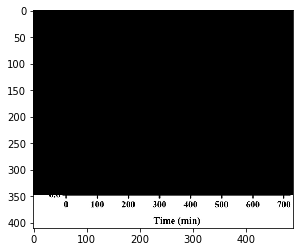

In [23]:
#Ahora se segmentará para que se detecte todo lo que esté debajo del eje X
n= 10
#columna, fila

region_of_interest_vertices = [
    (int(0), int(img_array.shape[0])),
    (int(0), int(ejex)),
    (int(img_array.shape[1]), int(ejex)),
    (int(img_array.shape[1]), int(img_array.shape[0]))]

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = region_of_interest(gray_image, 
                                   np.array([region_of_interest_vertices], np.int32),)

#Resizing the image
scale_percent = 220 # percent of original size
width = int(cropped_image_x.shape[1] * scale_percent / 100)
height = int(cropped_image_x.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized_x = cv2.resize(cropped_image_x, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized_x.shape)
 
plt.imshow(resized_x, cmap='gray')
plt.show()
cv2.imwrite('./resized_x.png', resized_x)

plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

Resized Dimensions :  (138, 1075)


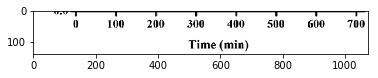

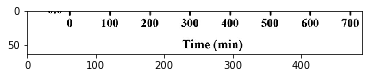

In [24]:
#Ahora se recortará para que se detecte todo lo que esté debajo del eje X

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#canny_image = cv2.Canny(gray_image, 50, 200)
cropped_image_x = gray_image[ejex:img_array.shape[0], 0:img_array.shape[1]]

#Resizing the image
scale_percent = 220 # percent of original size
width = int(cropped_image_x.shape[1] * scale_percent / 100)
height = int(cropped_image_x.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized_x = cv2.resize(cropped_image_x, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized_x.shape)
 
plt.imshow(resized_x, cmap='gray')
plt.show()
cv2.imwrite('./resized_x.png', resized_x)

plt.imshow(cropped_image_x, cmap = 'gray')
plt.show()

38
38


Text(0, 0.5, 'Promedio de los valores de esa fila')

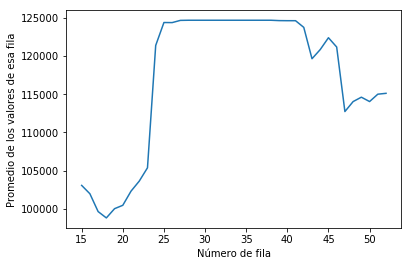

In [25]:
#Código para detectar el espacio de separación entre la leyenda del eje y los valores del eje

height = cropped_image_x.shape[0]
menor = height - height*0.75
mayor = height - height*0.15

means = []
file = []
for i in range(int(menor), int(mayor)):
    calc = np.sum(cropped_image_x[i,:])
    means.append(calc)
    file.append(i)
    
dict = {}
for key, value in zip(file, means):
    dict[key] = value
    
    
print(len(means))
print(len(file))
#valor = max(means)
#print(valor)
#def get_key(val): 
#    for key, value in dict.items(): 
#         if val == value: 
#             return key
#fila_new = get_key(valor)


plt.plot(file, means)
plt.xlabel('Número de fila')
plt.ylabel('Promedio de los valores de esa fila')


In [26]:
#Código para encontrar el punto medio entre ese espacio blanco de separación
import statistics
import heapq

lista_con_max = heapq.nlargest(3, means)
lista = []
for fila, suma in dict.items():
        for i in lista_con_max:
            if suma == i:
                lista.append(fila)
print(lista)
separacion = int(statistics.median(lista))
print(separacion)

[28, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 31, 32, 32, 32, 33, 33, 33, 34, 34, 34, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38]
33


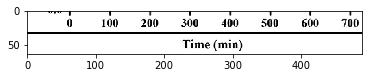

In [27]:
#Graficación de la línea de separación de los números y de la leyenda del eje X
if len(lista) <2:
    print("La imagen no tiene leyenda")

else:
    cropped_image_xcopy = cropped_image_x.copy()
    cv2.line(cropped_image_xcopy, (0,separacion), (img_array.shape[1],separacion), (0, 255, 0), 2)

    plt.imshow(cropped_image_xcopy, cmap = 'gray')
    plt.show()

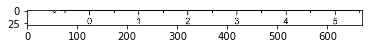

In [33]:
#Si el espacio es muy corto, significa que no hay leyenda en la imagen
if len(lista) <2:
    numbers = cropped_image_x

else:

    numbers = cropped_image_x[0:separacion, 0:img_array.shape[1]]
    
plt.imshow(numbers, cmap = 'gray')
plt.show()

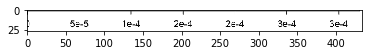

In [34]:
#Ahora específicamente solo los números
just_numbers = cropped_image_x[0:separacion, columna:columna_derecha]
plt.imshow(just_numbers, cmap = 'gray')
cv2.imwrite('./flip.png', just_numbers)
plt.show()